In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA

In [3]:
X, y = load_breast_cancer(True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
svm_pipe = make_pipeline(StandardScaler(), SVC())
tree_pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier())

In [34]:
svm_scores = cross_val_score(svm_pipe, X_train, y_train, cv = 10)
tree_scores = cross_val_score(tree_pipe, X_train, y_train, cv = 10)
print(f"SVM Score: {np.mean(svm_scores):.3f} +/- {np.std(svm_scores):.2f}")
print(f"Tree Score: {np.mean(tree_scores):.3f} +/- {np.std(tree_scores):.2f}")

SVM Score: 0.969 +/- 0.03
Tree Score: 0.912 +/- 0.04


In [56]:
svm_pipe.fit(X_train, y_train)
y_predicted = svm_pipe.predict(X_test)
conf = confusion_matrix(y_test, y_predicted)

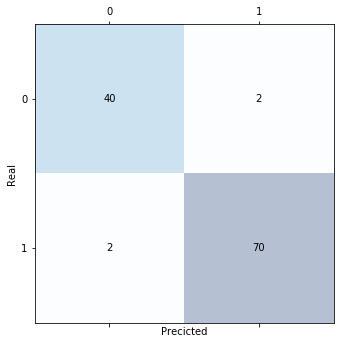

In [49]:
fig, ax = plt.subplots(figsize = (5.5, 5.5))
ax.matshow(conf, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        ax.text(x=i, y=j, s = conf[i][j], va = 'center', ha = 'center')
        
plt.xlabel('Precicted')
plt.ylabel('Real')
plt.show()

In [57]:
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
print(precision)
print(recall)

0.9722222222222222
0.9722222222222222


In [62]:
param_range = [0.001, 0.01, 0.1, 1, 10]
param_dict = [{'svc__C': param_range, 
                'svc__kernel': ['linear']},  # First combinations of params
              {'svc__C':param_range, 'svc__kernel': ['rbf'], 
               'svc__gamma': param_range}] # Second combinations of params

scorer = make_scorer(f1_score, pos_label = 0)
gs = GridSearchCV(svm_pipe, param_grid=param_dict, scoring=scorer, cv = 10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            

In [63]:
gs.best_params_

{'svc__C': 0.1, 'svc__kernel': 'linear'}

In [64]:
gs.best_score_

0.969680735930736

In [66]:
roc_curve(y_test, y_predicted)

(array([0.        , 0.04761905, 1.        ]),
 array([0.        , 0.97222222, 1.        ]),
 array([2, 1, 0]))